<h1 align="center">

**Time Series Analysis and Weather Forecast**

</h1>

<p align="center">Forecast the weather for the month of January via seasonal autoregression using Python, NumPy, pandas, Matplotlib, statsmodels, and mock data of daily temperatures for the past three years in Halstown City (fictional place).</p>

<br />

***

<br />

## Loading project dependencies

Load NumPy for advanced array operations.

In [37]:
import numpy as np

Load `pandas` for 2-dimensional data tables.

In [38]:
import pandas as pd

Load Python utilities to aid in creation of `x` ("Dates") and `y` ("Temperatures (in F°)") values.

In [39]:
from datetime import datetime
import random

Load Matplotlib to plot 2-dimensional data and visualize it.

In [40]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

`statsmodels` for an seasonal, autoregressive, time-series-analysis model

In [41]:
from statsmodels.tsa.ar_model import AutoReg

<br />

## Function definitions for getting data and preparing the line graph

Define a function to get mock data for daily temperatures in Halstown City.

In [42]:
def get_mock_temperature_data():
    avg_city_temperature_mock_data_by_month = [[31, 40], [28, 44], [31, 50], [30, 59], [
    31, 69], [30, 76], [31, 80], [31, 78], [30, 71], [31, 61], [30, 50], [31, 39]]
    mock_daily_temperature_data = []

    for _ in range(3):
        for month in avg_city_temperature_mock_data_by_month:
            for i in range(month[0]):
                mock_daily_temperature_data.append(
                    (month[1] - 4 + random.randrange(0, 8)))
    return mock_daily_temperature_data

Define a function to get chart data (`historical + forecasted`).

In [43]:
def get_line_graph_data():
    num_of_days_to_forecast = 30
    np_historical_data = np.array(get_mock_temperature_data())

    # forecast the `y` values based on historical `y` values via seasonal autoregression
    np_forecasted_data = pd.DataFrame(np_historical_data).apply(lambda x: AutoReg(x, lags=1, seasonal=True, period=int((
        (np_historical_data.size + num_of_days_to_forecast) / 365) + 1)).fit().forecast(num_of_days_to_forecast)).to_numpy()

    return np.concatenate((np.array(np_historical_data, dtype="float"), np.array(
        np_forecasted_data[:, 0], dtype="float")))

Define a function for preparing the plotting of a line graph.

In [44]:
def prepare_line_graph_visualization(line_graph_data):
    # resize the font to make more accessible
    plt.rcParams.update({"font.size": 18})

    fig, ax = plt.subplots()

    # plot `x` and `y` values
    ax.plot(pd.date_range("1/1/2020", freq="D",
                          periods=line_graph_data.size), line_graph_data)
    # create a span of time to highlight the forecast
    ax.axvspan(date2num(datetime(2023, 1, 1)), date2num(datetime(2023, 1, 31)),
               label="January 2023 Forecast", color="crimson", alpha=0.25)

    # set chart labels
    ax.set_title(
        "Historical and Forecasted Weather for Halstown City")
    ax.set_xlabel("Dates")
    ax.set_ylabel("Temperatures (in F°)")

    # add legend for forecast
    ax.legend()

    # auto-format "Dates"
    fig.autofmt_xdate()

<br />

## Preparing and showing line graph

Prepare line graph and then show it.

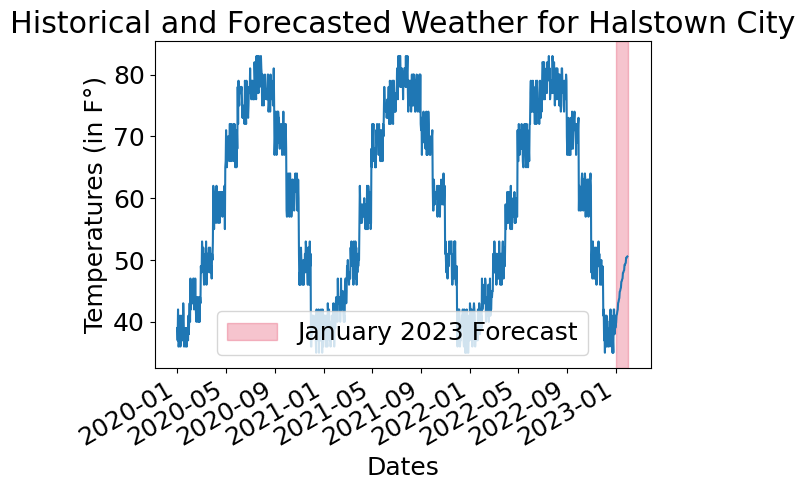

In [45]:
prepare_line_graph_visualization(get_line_graph_data())

plt.show()